## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score

In [2]:
filename="cleaned_marijuana_data.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


## Single-variable analysis

## INCOME

In [3]:
income_labels = ['0-4.9', '5-9.9', '10-14.9','15-19.9', '20-24.9', '25-34.9', '35-44.9', '45-54.9','55-64.9','65-74.9','75-99', '100+']

In [4]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['INCOME']==7777) | (df['INCOME']==9999) | (df['INCOME']==12) | (df['INCOME']==13)].index, inplace=True)

Text(0, 0.5, 'number of individuals')

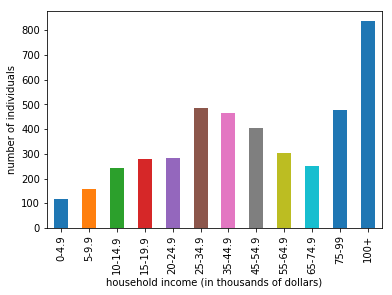

In [5]:
df['INCOME'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("number of individuals")

## FIRST USAGE

Text(0, 0.5, 'number of individuals')

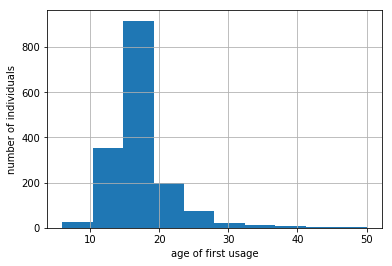

In [6]:
df['FIRST_USAGE'].hist()
plt.xlabel("age of first usage")
plt.ylabel("number of individuals")

## AMOUNT

In [7]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['AMOUNT']==7777) | (df['AMOUNT']==9999)].index, inplace=True)
amount_labels = ['1/day', '2/day', '3-5/day', '>6/day']

Text(0, 0.5, 'number of individuals')

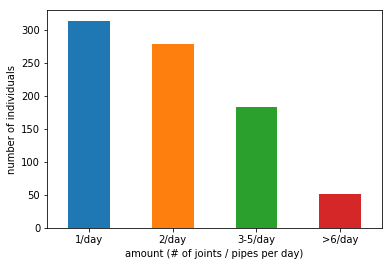

In [8]:
df['AMOUNT'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(4),amount_labels, rotation='horizontal')
plt.xlabel("amount (# of joints / pipes per day)")
plt.ylabel("number of individuals")

## FREQUENCY

In [9]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['FREQUENCY']==7777) | (df['FREQUENCY']==9999)].index, inplace=True)
freq_labels=['1/month','2-3/month','4-8/month','9-24/month','25-30/month']

Text(0, 0.5, 'number of individuals')

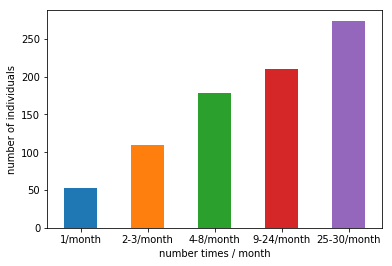

In [10]:
df['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(5),freq_labels, rotation='horizontal')
plt.xlabel("number times / month")
plt.ylabel("number of individuals")

## INCOME RATIO

Ratio of family income to poverty. Calculated according to the Department of Health and Human Services guidelines, which vary according to state, number of individuals in the family/household, and poverty threshold defined for the year.

$$\text{Ratio of family income to povery} = \frac{\text{family income}}{\text{poverty threshold income}}$$



Text(0, 0.5, 'number of individuals')

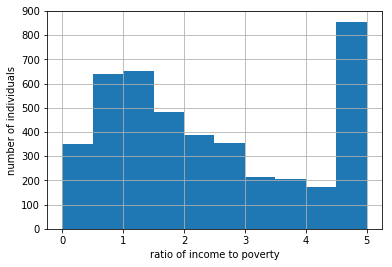

In [11]:
df['INCOME_RATIO'].hist()
plt.xlabel("ratio of income to poverty")
plt.ylabel("number of individuals")

## Data Subsets

In [12]:
min_age = df['AGE'].min()
max_age = df['AGE'].max()
min_age, max_age


(18.0, 69.0)

In [13]:
# subsetting data by hypothesis groups
# Group 1 : Young people (defined as 26 or younder)
df_y = df[df['AGE'] <= 26]
# Group 2 : Aged over 50
df_s = df[df['AGE'] >= 65]
df_s.isnull().sum()


ID                    0
GENDER                0
AGE                   0
EDUCATION_KID       372
EDUCATION_ADULT       0
MARRIAGE              0
PREGNANCY           372
INCOME               20
INCOME_RATIO         20
HOUSEHOLD_NUM         0
OVER_60_NUM           0
EVER_USE            372
FIRST_USAGE         372
FREQUENCY           372
PER_MONTH           372
PER_YEAR            372
LAST_ONCE_MONTH     372
AMOUNT              372
LAST_USAGE          372
PAST_MONTH_USAGE    372
CHILDREN_NUM          0
dtype: int64

### INCOME v. INCOME_RATIO

In [14]:
df[['INCOME','INCOME_RATIO']].corr()

,INCOME,INCOME_RATIO
INCOME,1.000000,0.877274
INCOME_RATIO,0.877274,1.000000


Text(0.5, 1.0, 'Household Income and Ratio of Income to Poverty')

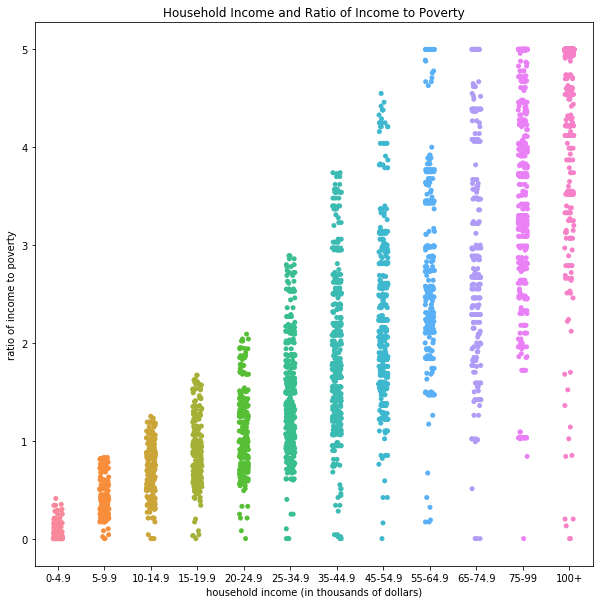

In [15]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='INCOME_RATIO', data=df)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("ratio of income to poverty")
plt.title("Household Income and Ratio of Income to Poverty")

Text(0.5, 1.0, 'Household Income and Ratio of Income to Poverty for Group 1 (aged 26 or younger)')

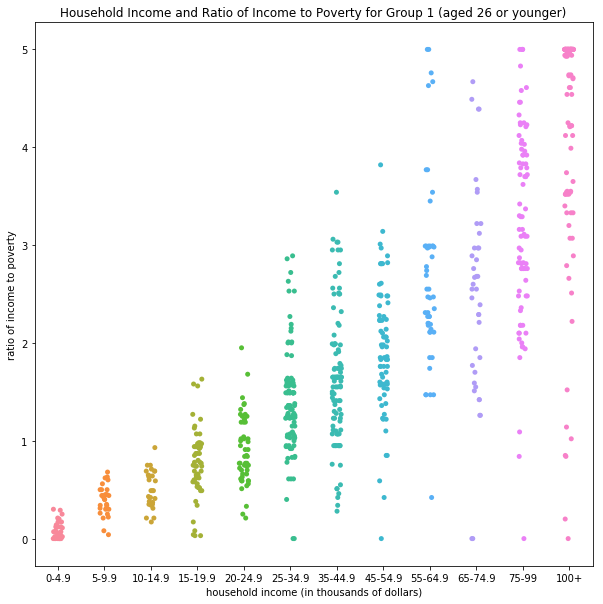

In [16]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='INCOME_RATIO', data=df_y)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("ratio of income to poverty")
plt.title("Household Income and Ratio of Income to Poverty for Group 1 (aged 26 or younger)")

Text(0.5, 1.0, 'Comparision of Household Income and Ratio of Income to Poverty for Group 2 (aged 50 or older)')

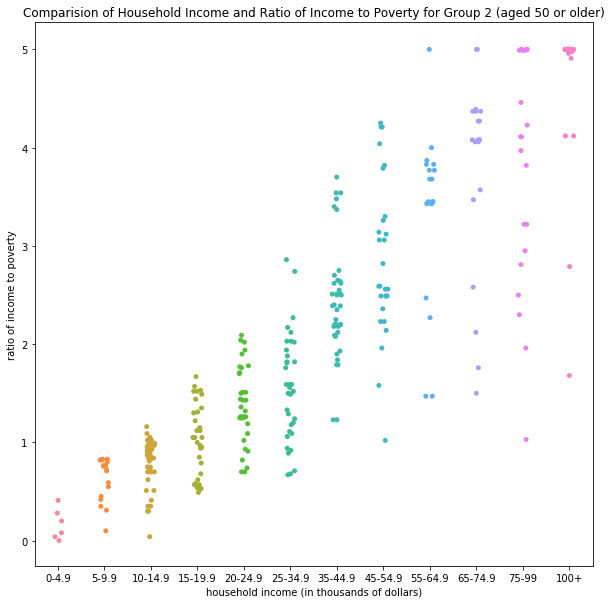

In [17]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='INCOME_RATIO', data=df_s)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("household income (in thousands of dollars)")
plt.ylabel("ratio of income to poverty")
plt.title("Comparision of Household Income and Ratio of Income to Poverty for Group 2 (aged 50 or older)")

## INCOME V. FIRST_USAGE

In [18]:
df[['INCOME', 'FIRST_USAGE']].corr()

,INCOME,FIRST_USAGE
INCOME,1.000000,0.057181
FIRST_USAGE,0.057181,1.000000


### Group 1:  26 or younger

Text(0.5, 1.0, 'Household Income and Age of first usage for Group 1 (aged 26 or younger)')

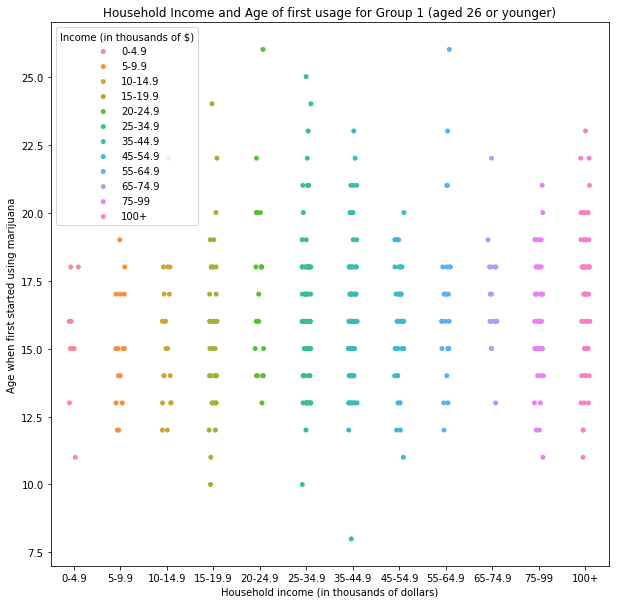

In [19]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='FIRST_USAGE', data=df_y)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Age when first started using marijuana")
plt.legend(income_labels, title='Income (in thousands of $)', loc='best')
plt.title("Household Income and Age of first usage for Group 1 (aged 26 or younger)")

### Group 2: 65 or older

Text(0.5, 1.0, 'Household Income and Age of first usage for Group 2 (aged 50 or older)')

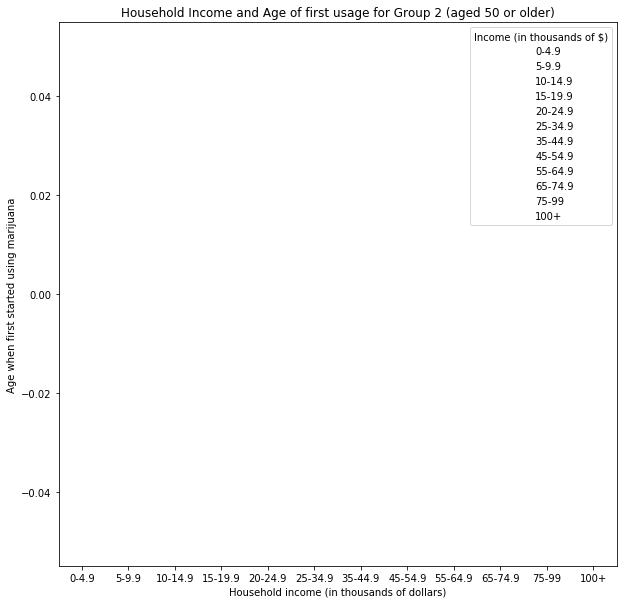

In [20]:
plt.figure(figsize=(10,10))
sns.stripplot(x='INCOME', y='FIRST_USAGE', data=df_s)
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Age when first started using marijuana")
plt.legend(income_labels, title='Income (in thousands of $)', loc='best')
plt.title("Household Income and Age of first usage for Group 2 (aged 50 or older)")

### INCOME_RATIO v. FIRST_USAGE 

In [21]:
df[['INCOME_RATIO', 'FIRST_USAGE']].corr()

,INCOME_RATIO,FIRST_USAGE
INCOME_RATIO,1.000000,0.067714
FIRST_USAGE,0.067714,1.000000


In [22]:
#functions for converting from numerical to categorical data
def num_to_category(num_val, data_dict):
    if num_val in data_dict.keys():
        return data_dict[num_val]
    else:
        return np.nan
    
# GENDER
df['GENDER']
gender_dict = {1:'MALE',2:'FEMALE'}
df['GENDER']=df['GENDER'].apply(num_to_category, data_dict=gender_dict)
df_y['GENDER']=df_y['GENDER'].apply(num_to_category, data_dict=gender_dict)
df_s['GENDER']=df_s['GENDER'].apply(num_to_category, data_dict=gender_dict)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


### Group 1: 26 or younger

Text(0.5, 1.0, 'Ratio of Income to Poverty and Age of first usage for Group 1 (aged 26 or younger)')

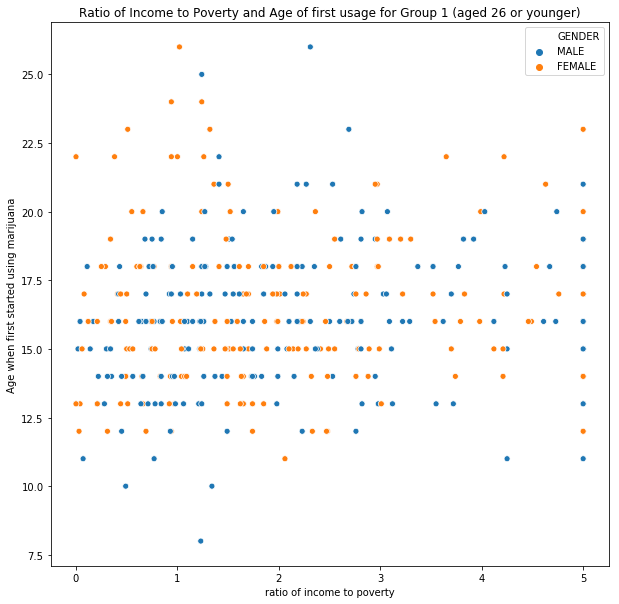

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='INCOME_RATIO',y='FIRST_USAGE', data=df_y, hue='GENDER')
plt.xlabel("ratio of income to poverty")
plt.ylabel("Age when first started using marijuana")
plt.title("Ratio of Income to Poverty and Age of first usage for Group 1 (aged 26 or younger)")

In [24]:
#outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME_RATIO+GENDER', df_y)
#mod = sm.OLS(outcome, predictors)
#res = mod.fit() 
#print(res.summary())

### Group 2: Older than 65

Text(0.5, 1.0, 'Ratio of Income to Poverty and Age of first usage for Group 2 (aged 50 or older)')

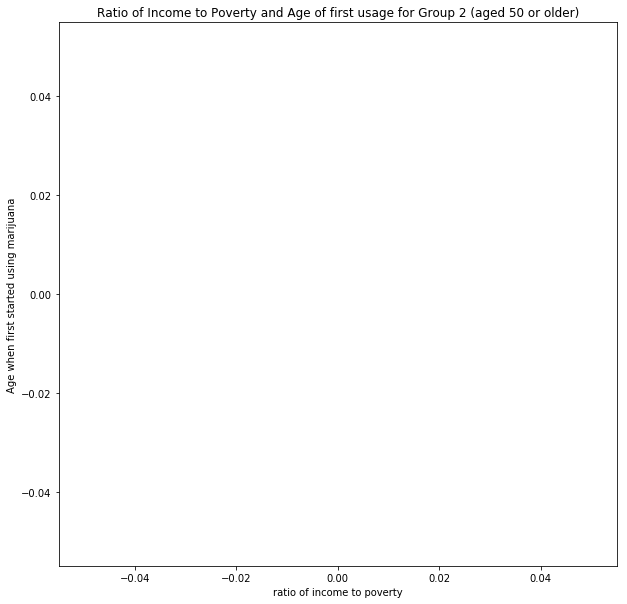

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='INCOME_RATIO',y='FIRST_USAGE', data=df_s, hue='GENDER')
plt.xlabel("ratio of income to poverty")
plt.ylabel("Age when first started using marijuana")
plt.title("Ratio of Income to Poverty and Age of first usage for Group 2 (aged 50 or older)")

In [26]:
#outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME_RATIO', df_s)
#mod = sm.OLS(outcome, predictors)
#res = mod.fit() 
#print(res.summary())

In [27]:
df_y[['INCOME','AMOUNT']].head()

,INCOME,AMOUNT
4,7.0,2.0
6,15.0,NaN
14,7.0,NaN
15,1.0,NaN
23,NaN,4.0


### INCOME v. AMOUNT

Text(0, 0.5, 'Amount of marijuana consumed (joints/pipes per day)')

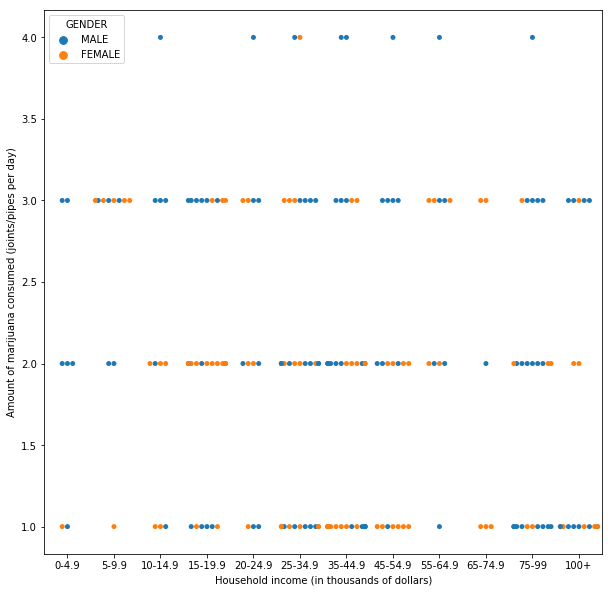

In [28]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='INCOME', y='AMOUNT', data=df_y, hue='GENDER')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Amount of marijuana consumed (joints/pipes per day)")

### INCOME_RATIO v. AMOUNT

Text(0.5, 0, 'AMOUNT')

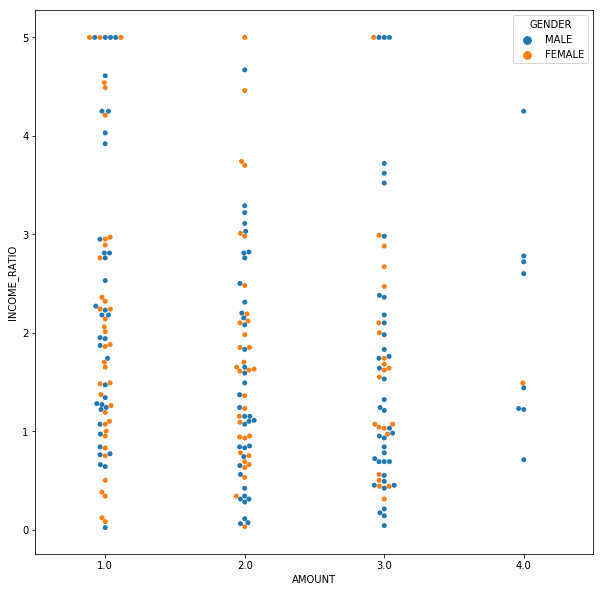

In [29]:
plt.figure(figsize=(10,10))
sns.swarmplot(df_y['AMOUNT'], df_y['INCOME_RATIO'], data=df_y, hue='GENDER')
plt.xlabel("AMOUNT")

### INCOME v. FREQUENCY

Text(0.5, 0, 'Household income (in thousands of dollars)')

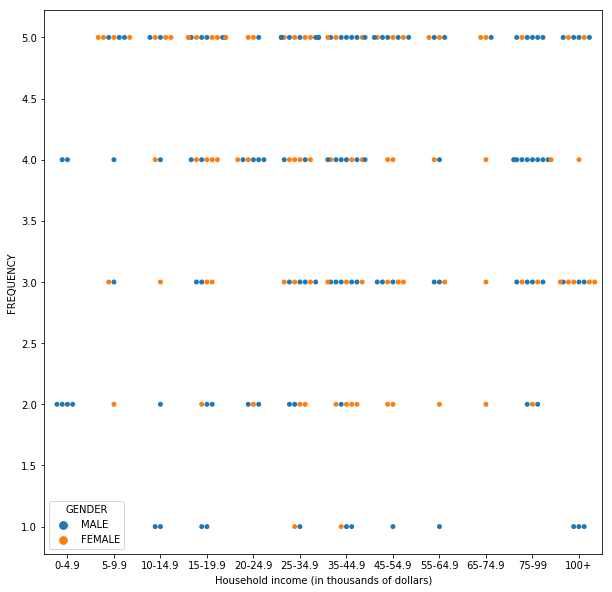

In [30]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='INCOME', y='FREQUENCY', data=df_y, hue='GENDER')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household income (in thousands of dollars)")

In [31]:
outcome, predictors = patsy.dmatrices('INCOME~FREQUENCY', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCOME   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02552
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.873
Time:                        12:28:50   Log-Likelihood:                -596.83
No. Observations:                 212   AIC:                             1198.
Df Residuals:                     210   BIC:                             1204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6139      0.849      8.971      0.0

### INCOME_RATIO v. FREQUENCY

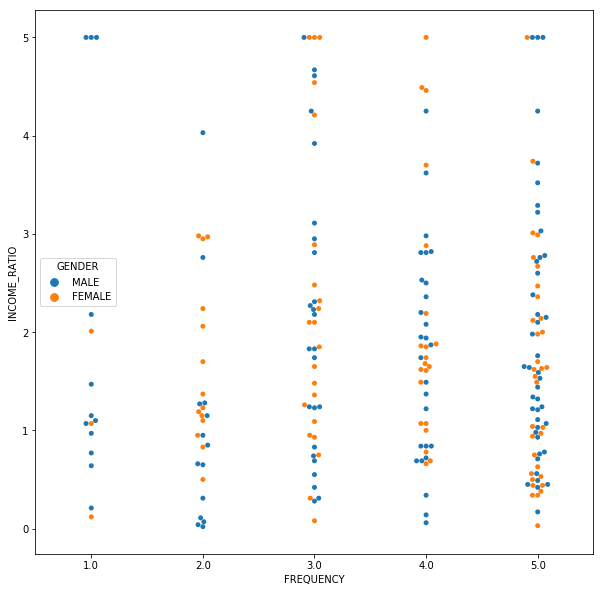

In [32]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='FREQUENCY', y='INCOME_RATIO',data=df_y, hue='GENDER')

### SOCIOECONOMIC STATUS: ANALYSIS OF INCOME BRACKETS

### INCOME RATIO V. FIRST_USAGE

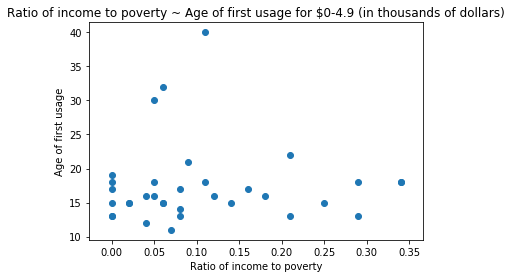

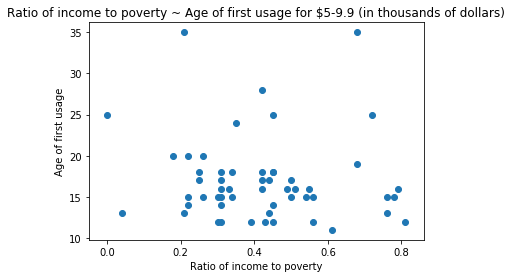

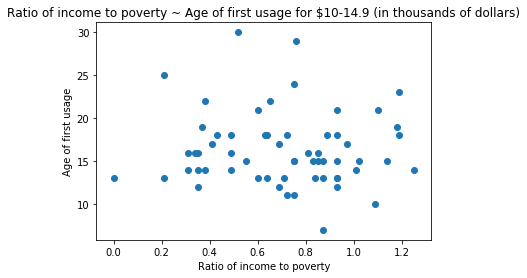

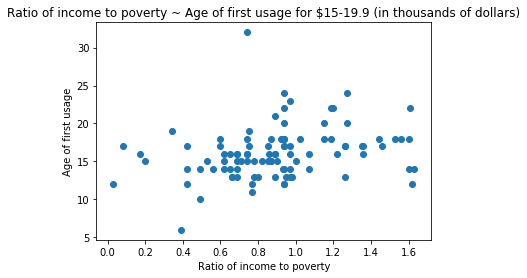

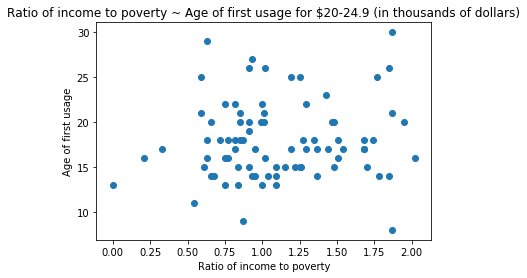

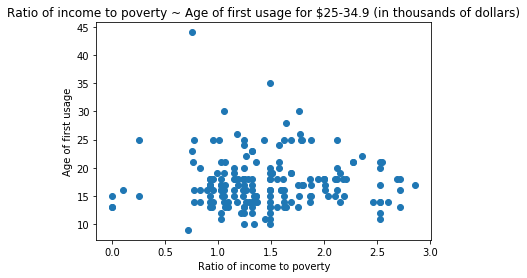

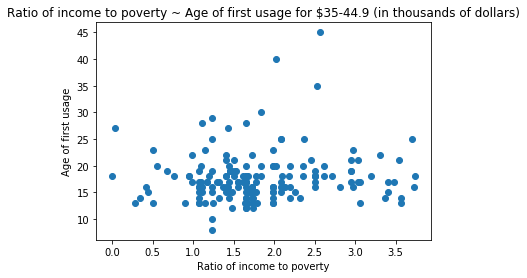

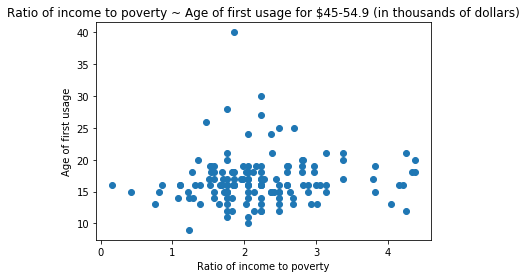

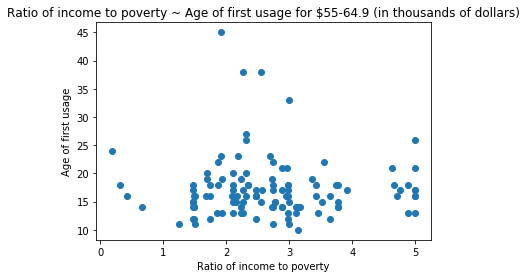

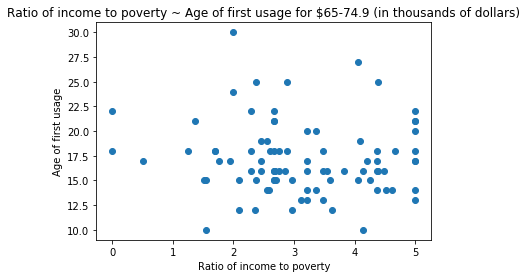

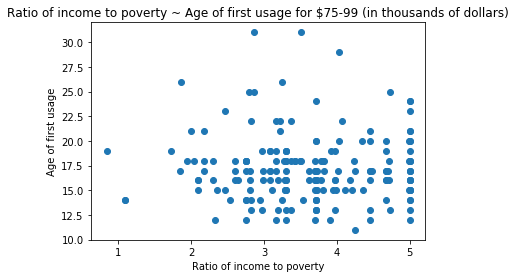

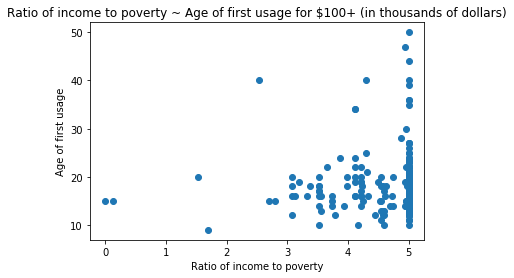

In [33]:
income_vals = df['INCOME'].value_counts().sort_index().index
income_dict={1:'0-4.9', 2:'5-9.9', 3:'10-14.9',4:'15-19.9', 5:'20-24.9', 6:'25-34.9', 7:'35-44.9', 8:'45-54.9',9:'55-64.9',10:'65-74.9',14:'75-99', 15:'100+'}
for i in income_vals:
    df_i = df[df['INCOME']==i]
    plt.figure()
    plt.scatter(df_i['INCOME_RATIO'],df_i['FIRST_USAGE'])
    plt.xlabel("Ratio of income to poverty")
    plt.ylabel("Age of first usage")
    plt.title("Ratio of income to poverty ~ Age of first usage for $" + income_dict[i] + " (in thousands of dollars)")
    plt.show()

In [35]:
df[['INCOME', 'INCOME_RATIO', 'FIRST_USAGE']]

,INCOME,INCOME_RATIO,FIRST_USAGE
0,10.0,4.39,NaN
1,4.0,1.32,NaN
2,10.0,5.00,NaN
3,7.0,1.23,25.0
4,7.0,2.08,15.0
5,6.0,1.03,18.0
6,15.0,5.00,NaN
7,3.0,1.19,18.0
8,3.0,0.75,NaN
9,10.0,1.36,21.0


### INCOME_RATIO V.  FREQUENCY

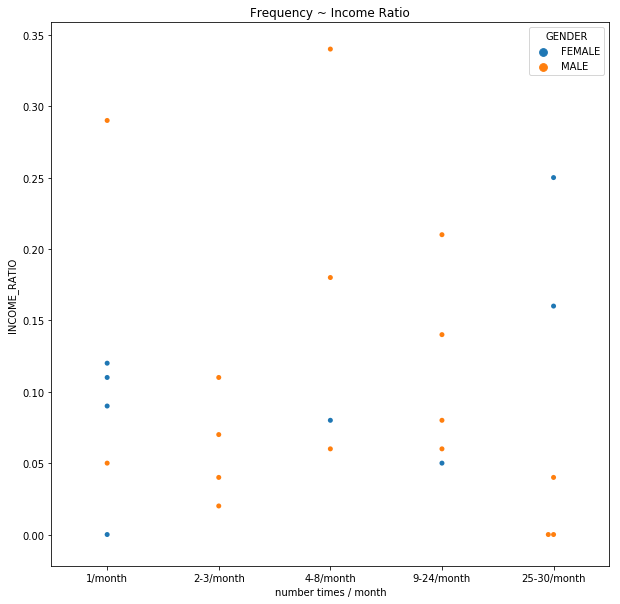

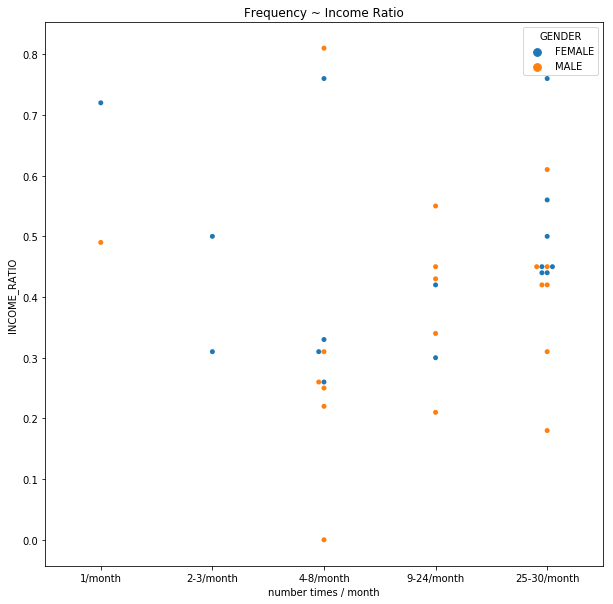

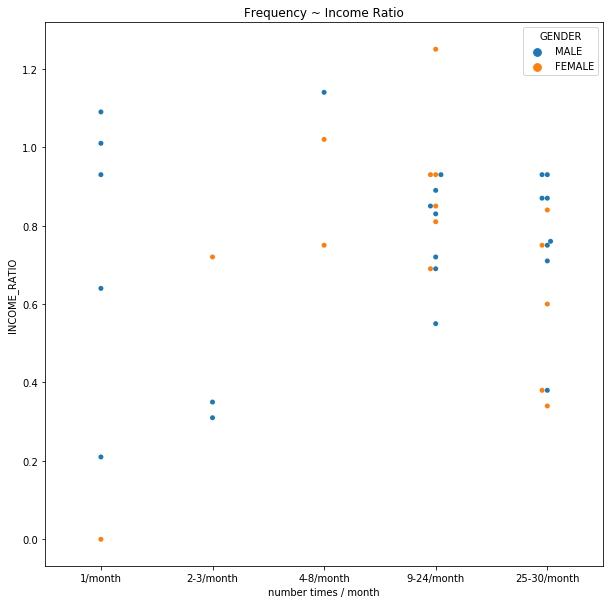

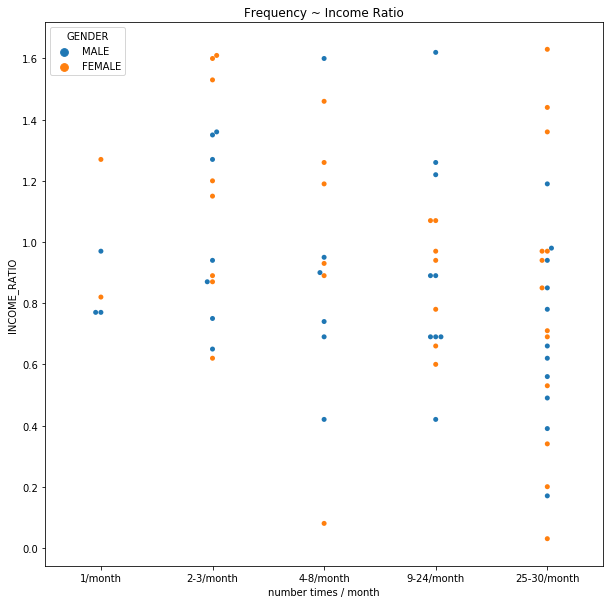

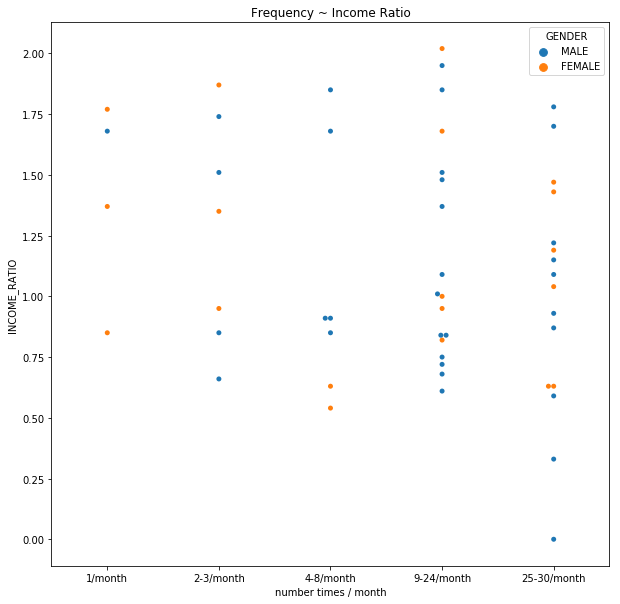

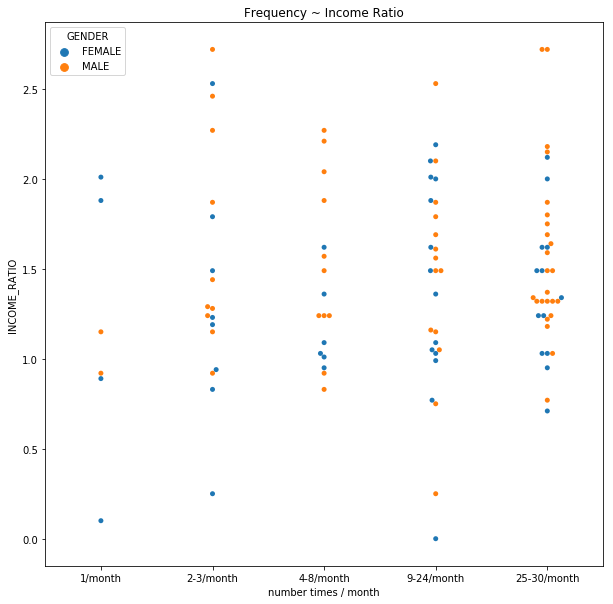

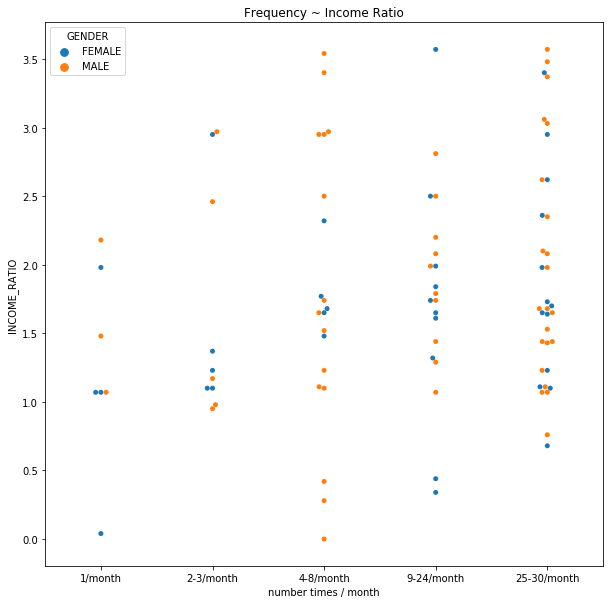

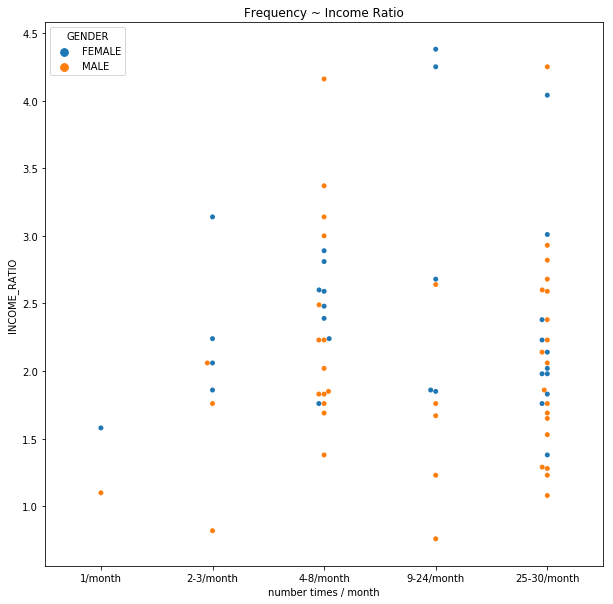

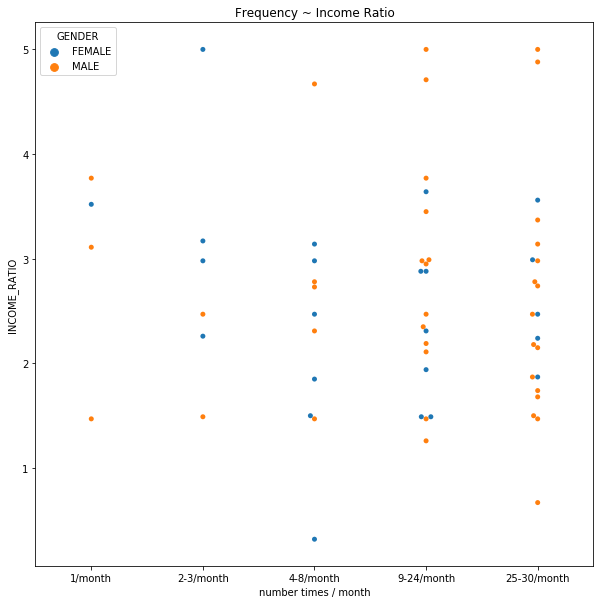

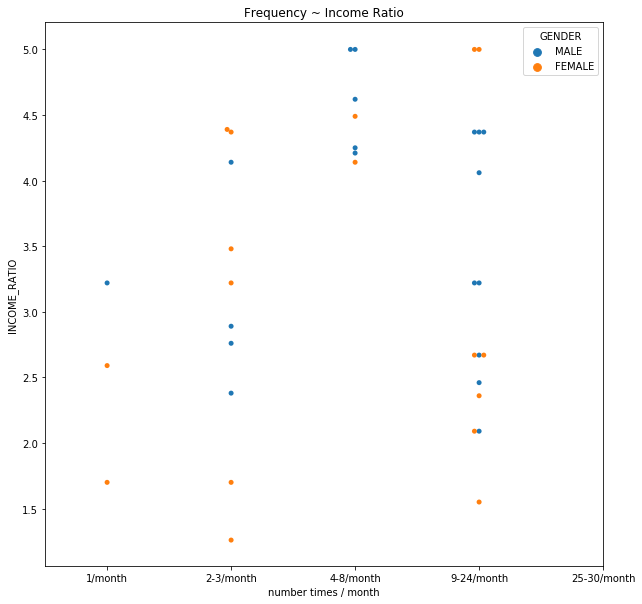

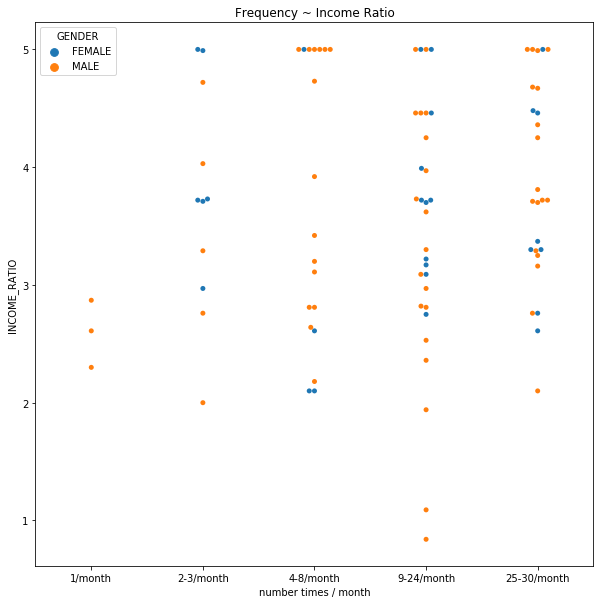

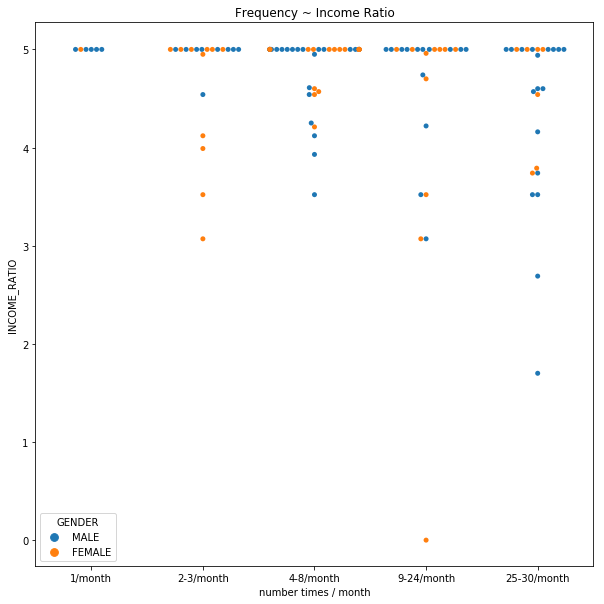

In [36]:
for i in income_vals:
    df_i = df[df['INCOME']==i]
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='FREQUENCY', y='INCOME_RATIO',data=df_i, hue='GENDER')
    plt.xticks(np.arange(5),freq_labels, rotation='horizontal')
    plt.xlabel("number times / month")
    plt.title("Frequency ~ Income Ratio")

### INCOME_RATIO V. AMOUNT

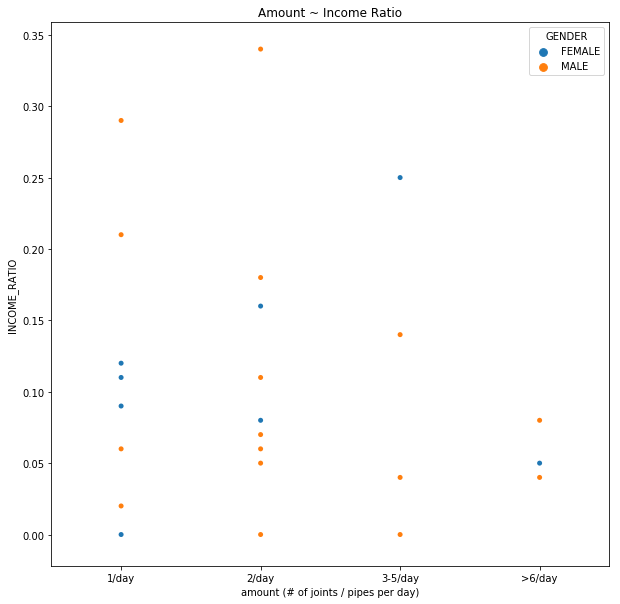

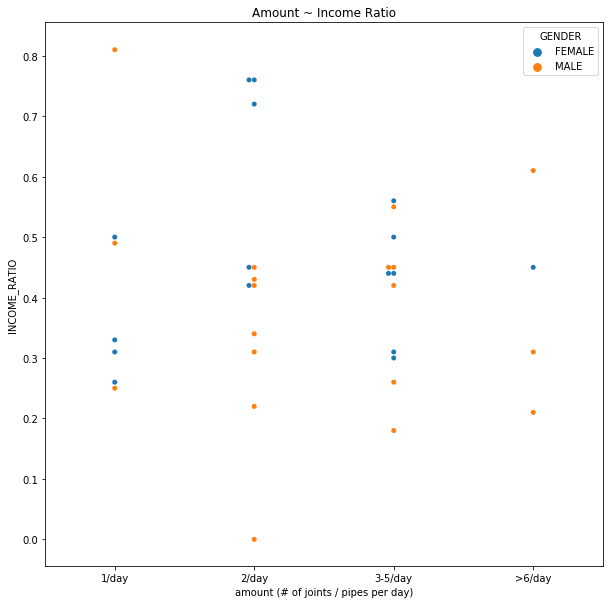

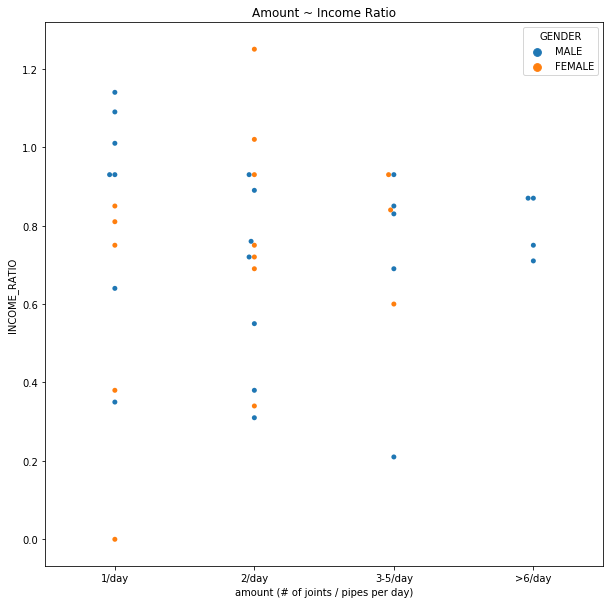

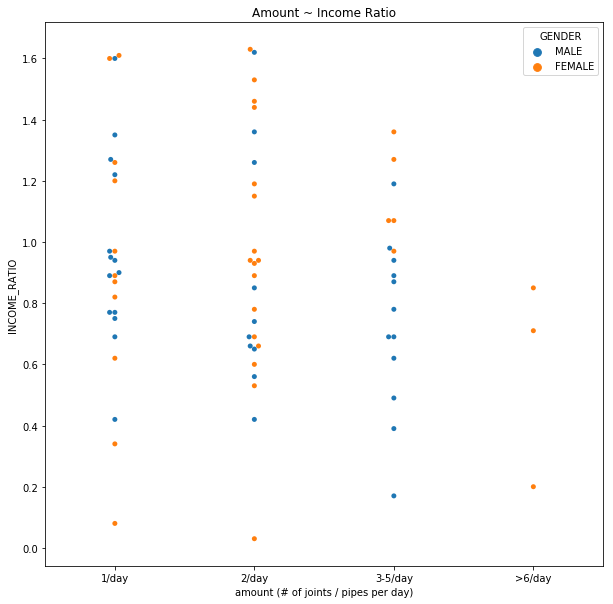

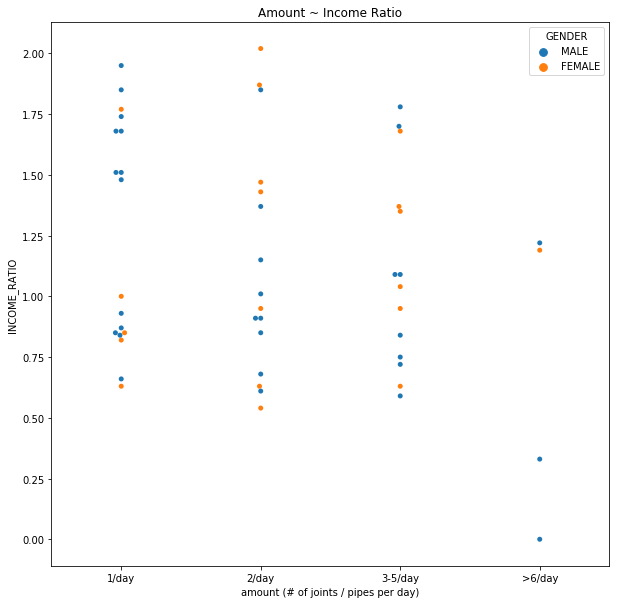

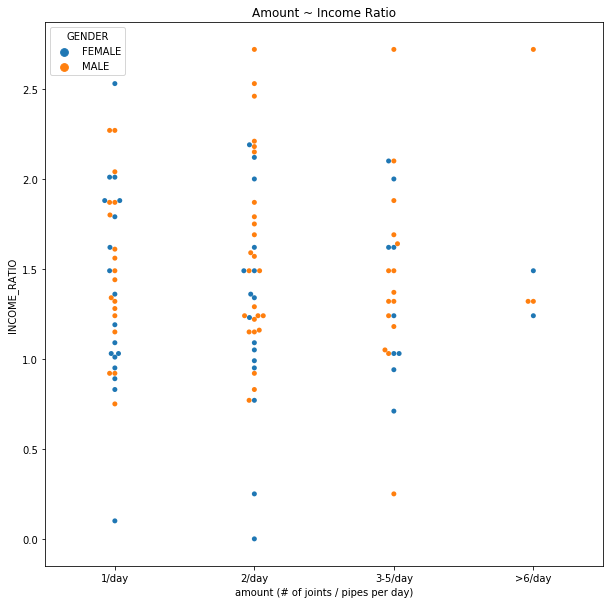

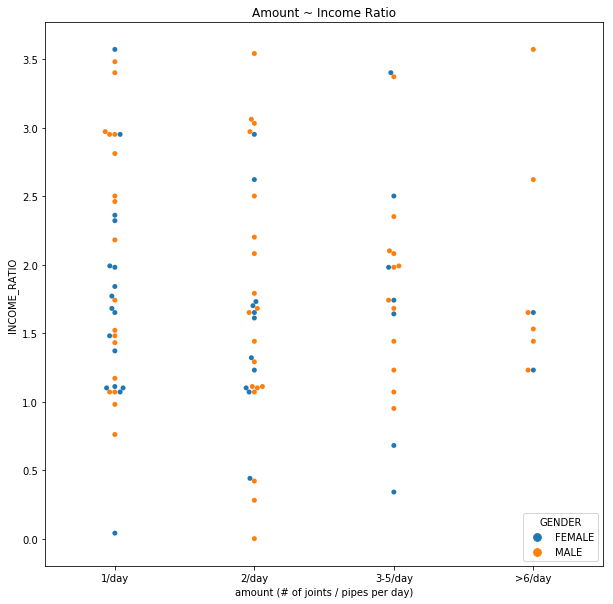

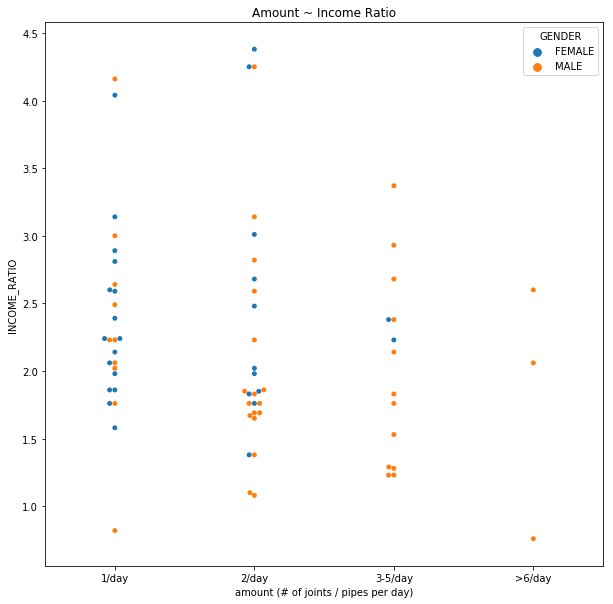

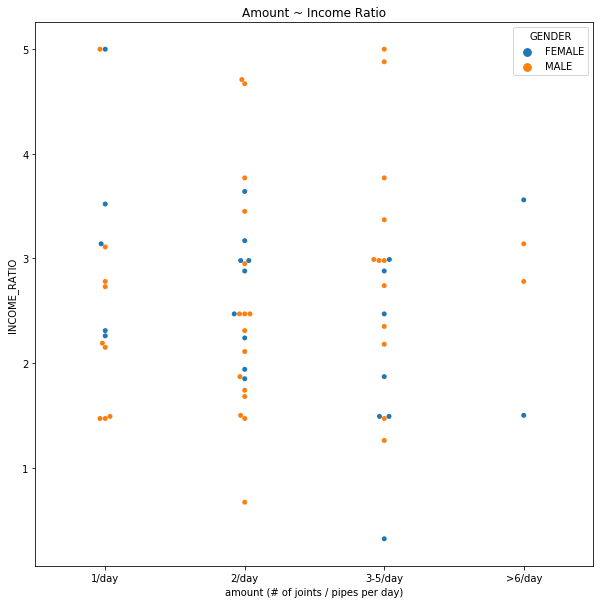

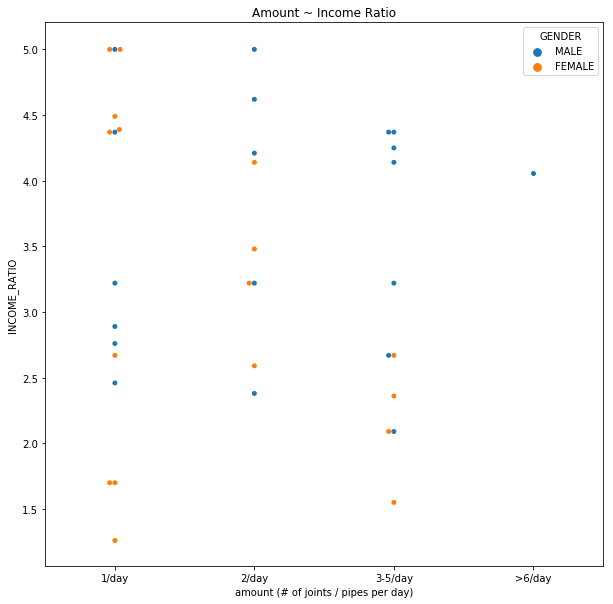

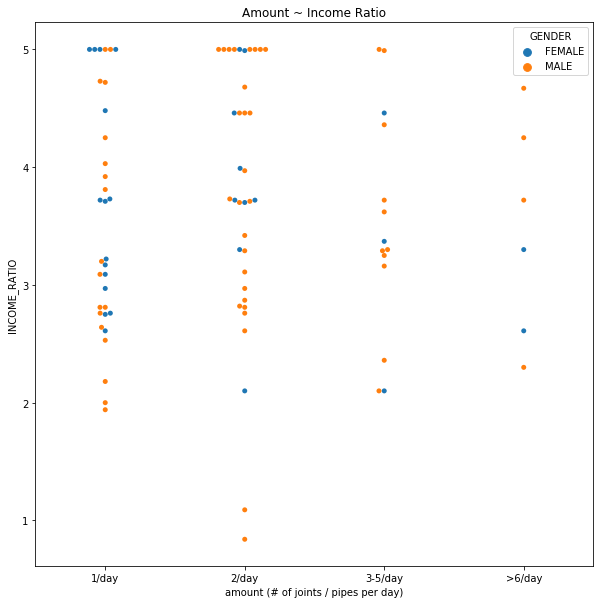

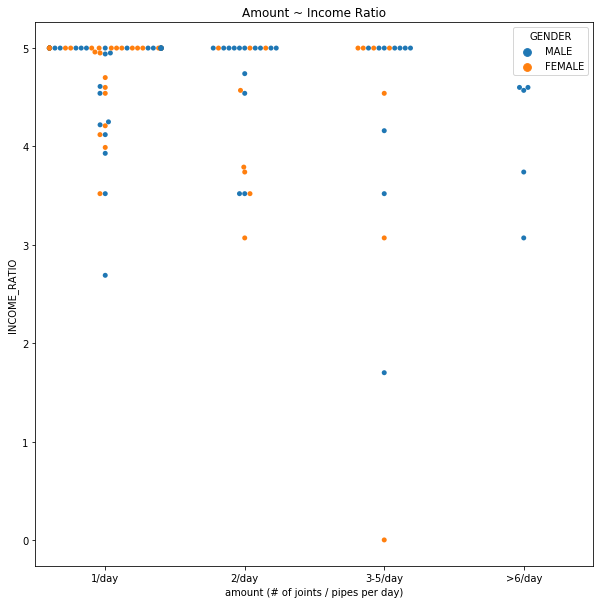

In [37]:
for i in income_vals:
    df_i = df[df['INCOME']==i]
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='AMOUNT', y='INCOME_RATIO',data=df_i, hue='GENDER')
    plt.xticks(np.arange(4),amount_labels, rotation='horizontal')
    plt.xlabel("amount (# of joints / pipes per day)")
    plt.title("Amount ~ Income Ratio")

### CORRELATION MATRIX

In [38]:
# CORRELATIONS
df[['GENDER', 'AGE', 'EDUCATION_ADULT','INCOME', 'INCOME_RATIO', 'FIRST_USAGE','FREQUENCY','AMOUNT']].corr()

,AGE,EDUCATION_ADULT,INCOME,INCOME_RATIO,FIRST_USAGE,FREQUENCY,AMOUNT
AGE,1.000000,-0.121717,-0.046392,0.073587,0.135310,-0.096410,-0.128549
EDUCATION_ADULT,-0.121717,1.000000,0.404952,0.451129,0.132255,-0.025769,-0.229221
INCOME,-0.046392,0.404952,1.000000,0.877274,0.057181,-0.014227,-0.147287
INCOME_RATIO,0.073587,0.451129,0.877274,1.000000,0.067714,-0.013559,-0.178591
FIRST_USAGE,0.135310,0.132255,0.057181,0.067714,1.000000,-0.185904,-0.240660
FREQUENCY,-0.096410,-0.025769,-0.014227,-0.013559,-0.185904,1.000000,0.504658
AMOUNT,-0.128549,-0.229221,-0.147287,-0.178591,-0.240660,0.504658,1.000000


## OLS Regression

### Group 1 : Aged 26 or younger

In [50]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            FIRST_USAGE   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.251
Date:                Wed, 05 Jun 2019   Prob (F-statistic):             0.0128
Time:                        12:33:36   Log-Likelihood:                -975.85
No. Observations:                 407   AIC:                             1956.
Df Residuals:                     405   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6506      0.290     54.036      0.0

In [51]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('AMOUNT~INCOME', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.422
Date:                Wed, 05 Jun 2019   Prob (F-statistic):             0.0208
Time:                        12:33:45   Log-Likelihood:                -273.41
No. Observations:                 212   AIC:                             550.8
Df Residuals:                     210   BIC:                             557.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2805      0.128     17.863      0.0

In [52]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('FREQUENCY~INCOME', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02552
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.873
Time:                        12:33:54   Log-Likelihood:                -351.97
No. Observations:                 212   AIC:                             707.9
Df Residuals:                     210   BIC:                             714.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6864      0.185     19.933      0.0

In [54]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('AMOUNT~INCOME+EDUCATION_ADULT', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.109
Date:                Wed, 05 Jun 2019   Prob (F-statistic):            0.00279
Time:                        12:34:13   Log-Likelihood:                -201.06
No. Observations:                 159   AIC:                             408.1
Df Residuals:                     156   BIC:                             417.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8890      0.270     

In [55]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME+EDUCATION_ADULT', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            FIRST_USAGE   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     15.86
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.80e-07
Time:                        12:34:27   Log-Likelihood:                -736.47
No. Observations:                 307   AIC:                             1479.
Df Residuals:                     304   BIC:                             1490.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2315      0.634     

In [56]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('FREQUENCY~INCOME+EDUCATION_ADULT', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2935
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.746
Time:                        12:35:31   Log-Likelihood:                -258.50
No. Observations:                 159   AIC:                             523.0
Df Residuals:                     156   BIC:                             532.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9230      0.388     

In [57]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('AMOUNT~INCOME+GENDER', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.851
Date:                Wed, 05 Jun 2019   Prob (F-statistic):            0.00337
Time:                        12:36:10   Log-Likelihood:                -270.33
No. Observations:                 212   AIC:                             546.7
Df Residuals:                     209   BIC:                             556.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1279      0.140     15.

In [58]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('FIRST_USAGE~INCOME+GENDER', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            FIRST_USAGE   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.736
Date:                Wed, 05 Jun 2019   Prob (F-statistic):             0.0247
Time:                        12:36:34   Log-Likelihood:                -975.24
No. Observations:                 407   AIC:                             1956.
Df Residuals:                     404   BIC:                             1969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.7919      0.317     49.

In [59]:
# Aged 26 or younger
outcome, predictors = patsy.dmatrices('FREQUENCY~INCOME+GENDER', df_y)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1899
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.827
Time:                        12:36:58   Log-Likelihood:                -351.79
No. Observations:                 212   AIC:                             709.6
Df Residuals:                     209   BIC:                             719.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7402      0.206     18.